## Recurrent Neural Net

In this short demo, we will train a long-short term memory network to classify pictures of digits.

In [16]:
# Import the components we need to train a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import matplotlib.pyplot as plt #for plotting
%matplotlib inline

### Load the mnist dataset

train_x, train_y are our training data, feature and target respectively. And test_x, test_y are data to validate our model.

In [2]:
mnist= tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()


11493376/11490434 [==============================] - 5s 0us/step


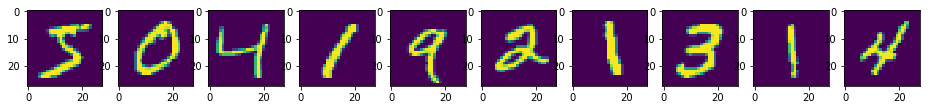

In [23]:
# preview the images first
plt.figure(figsize=(16,9))
x, y = 10, 1
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_x[i].reshape((28,28)),interpolation='nearest')
plt.show()

Here above we can see the images of the digits. Each individual image has 28x28 pixels. The values of a pixel range from 0 to 1, depending how 'light up' they are. The idea is to train a model which can recognize a pattern for each digit, according to how much the pixels are light up and at which position they are.

In [9]:
train_x = train_x/255.0
test_x = test_x/255.0

print(train_x.shape)

(60000, 28, 28)


### Long-short term memory

Long-short term memory keeps tracks of the input data from the 'past'. So it is designed for sequences where the ordering is important/or the current value has impact on the next value(s). In our digits example, the ordering of the data is most certainly important, because it tells the position of the light up pixels, which eventually make up the digits.

Here we initialize our LSTM model, passing parameters like number of neurons, dropout percentage, activation function etc. Those can (should) be tweaked in order to find a good model.

In [10]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_x.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2)) # add dropout layers to help preventing overfitting

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total para

In [11]:
model.fit(train_x, train_y, epochs=3, validation_data=(test_x, test_y ))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.6136 - acc: 0.7959 - val_loss: 0.1478 - val_acc: 0.9575
Epoch 2/3
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.1620 - acc: 0.9556 - val_loss: 0.1119 - val_acc: 0.9696
Epoch 3/3
60000/60000 [==============================] - 142s 2ms/sample - loss: 0.1157 - acc: 0.9683 - val_loss: 0.0708 - val_acc: 0.9799


### Results

As we can see, after 3 epochs of training, the model already has achieved an accuracy of almost 98%. 

In this quick demo, we showed what a recurrent neural net, (in our case, LSTM) is capable of. It accurately predicted the digits 0-9, using only 60000 samples and 3 epochs of training. For future improvement, we can add more examples/epochs, tweak the parameters.